In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toxic_comments = pd.read_csv(r'jigsaw-toxic-comment-train.csv')
toxic_comments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
toxic_comments.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [4]:
toxic_comments.shape

(223549, 8)

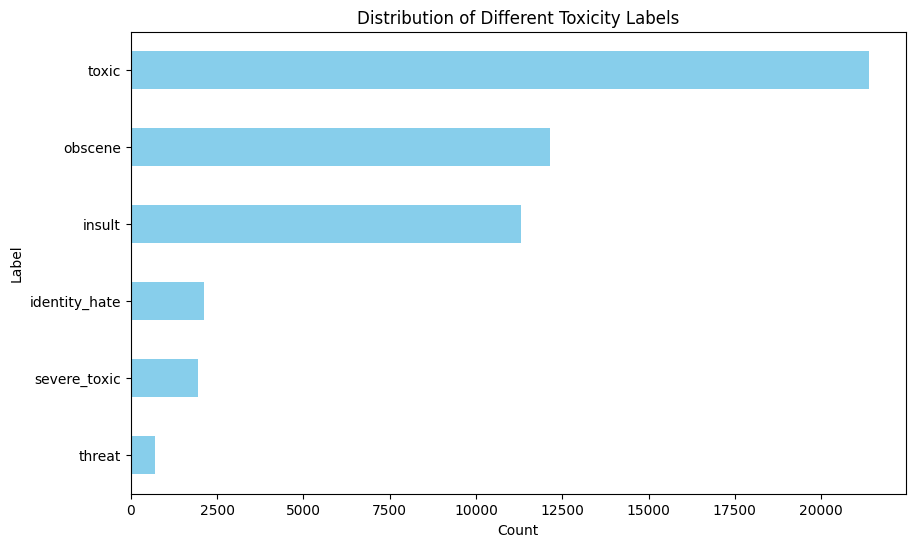

In [5]:
# List of label columns
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Plot the distribution of each label
plt.figure(figsize=(10, 6))
toxic_comments[label_columns].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Different Toxicity Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()


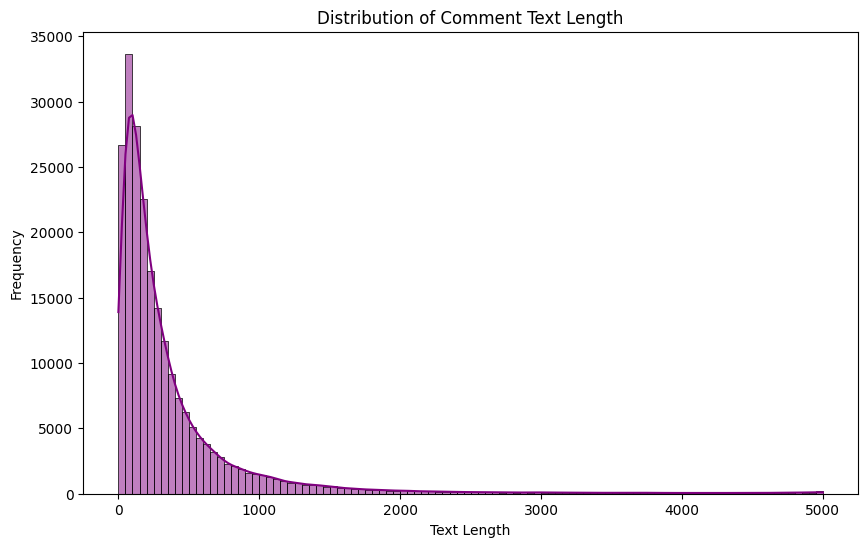

In [6]:
toxic_comments['text_length'] = toxic_comments['comment_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(toxic_comments['text_length'], bins=100, kde=True, color='purple')
plt.title('Distribution of Comment Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

<Axes: >

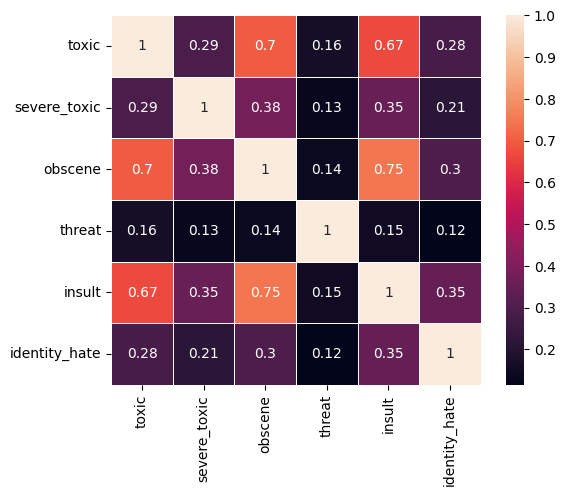

In [7]:
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
correlation_matrix = toxic_comments[label_columns].corr()
sns.heatmap(correlation_matrix,annot=True,square = True, linewidth = .5)


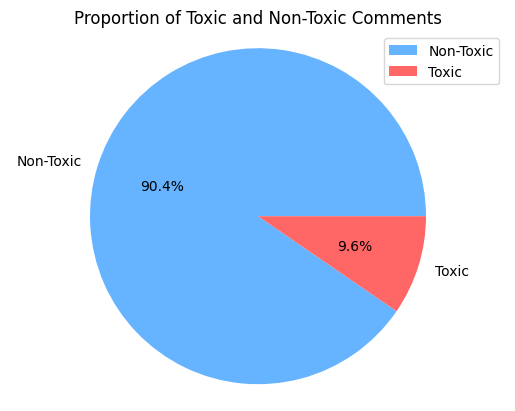

In [8]:
toxic_comments['is_toxic'] = toxic_comments['toxic'] > 0

# Count the number of toxic and non-toxic comments
toxic_counts = toxic_comments['is_toxic'].value_counts()

# Plot the pie chart
labels = ['Non-Toxic', 'Toxic']
sizes = toxic_counts.values
colors = ['#66b3ff', '#ff6666']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Toxic and Non-Toxic Comments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels, loc='upper right')
plt.show()

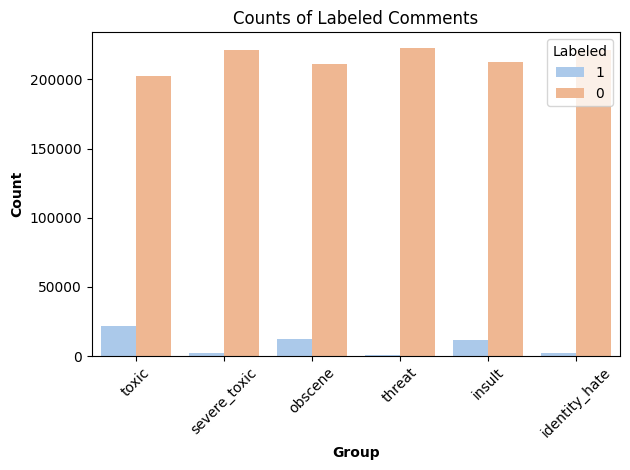

In [9]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
bars1 = [sum(toxic_comments[label] == 1) for label in labels]
bars2 = [sum(toxic_comments[label] == 0) for label in labels]

# Create DataFrame for seaborn plotting
df = pd.DataFrame({'Labels': labels * 2,
                   'Count': bars1 + bars2,
                   'Labeled': ['1'] * len(labels) + ['0'] * len(labels)})

# Plotting
sns.barplot(x='Labels', y='Count', hue='Labeled', data=df, palette='pastel')

plt.xlabel('Group', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Counts of Labeled Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Labeled')
plt.show()

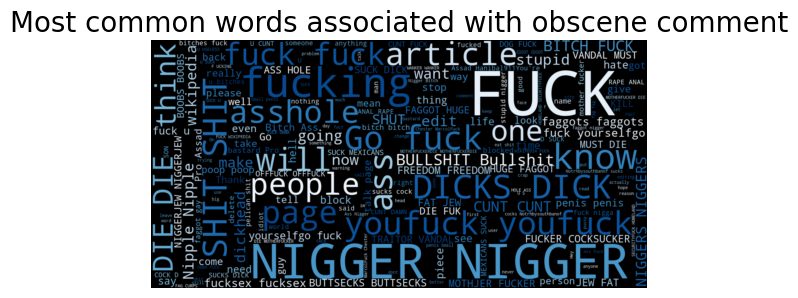

Top 10 words: ['FUCK', 'NIGGER NIGGER', 'fucking', 'know', 'SHIT SHIT', 'ass', 'DICKS DICK', 'Go fuck', 'youfuck youfuck', 'page']


In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def W_Cloud(token):
    """
    Visualize the most common words contributing to the token and return the top 10 words.
    """
    # Filter comments for the given token
    threat_context = toxic_comments[toxic_comments[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    
    # Generate the word cloud
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)
    
    # Plot the word cloud
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words associated with {token} comment", size=20)
    plt.show()
    
    # Extract the most common words
    word_freq = wordcloud.words_
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Return the top 10 words
    return [word for word, freq in top_words]

# Interactive visual: enter the label name.
token = input('Choose a class to visualize the most common words contributing to the class:')
top_words = W_Cloud(token.lower())
print("Top 10 words:", top_words)
